In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
import pandas as pd

df = pd.read_excel('../../data/VMI_data.xls')
df['CRET_TIME'] = pd.to_datetime(df['CRET_TIME'], format='%Y%m%d%H%M%S')
df.drop_duplicates(subset=["Part Number", "CRET_TIME"], inplace=True)
pivot_table = df.pivot(index="Part Number", columns="CRET_TIME", values="D일 투입예정 수량(D일계획)")
pivot_table.fillna(0, inplace=True)
pivot_table.shape

(117, 153)

In [35]:
pivot_table

CRET_TIME,2021-09-13 18:03:00,2021-09-14 06:00:05,2021-09-14 06:02:05,2021-09-14 06:03:04,2021-09-14 17:03:00,2021-09-15 06:02:00,2021-09-15 06:03:07,2021-09-15 16:03:03,2021-09-16 06:03:02,2021-09-16 06:03:08,...,2021-10-28 15:03:00,2021-10-28 16:02:06,2021-10-29 06:03:00,2021-10-29 06:03:02,2021-10-29 07:00:06,2021-10-29 12:03:04,2021-10-29 15:00:03,2021-10-29 15:03:08,2021-10-30 07:00:04,2021-11-01 07:00:03
Part Number,,,,,,,,,,,,,,,,,,,,,
Part 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Part 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Part 10,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,23.0,23.0,...,178.0,178.0,178.0,156.0,156.0,156.0,156.0,156.0,156.0,104.0
Part 100,38.0,38.0,35.0,35.0,35.0,40.0,40.0,40.0,38.0,38.0,...,33.0,33.0,33.0,23.0,23.0,23.0,23.0,23.0,23.0,0.0
Part 101,0.0,0.0,0.0,0.0,0.0,77.0,77.0,77.0,78.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Part 95,113.0,113.0,209.0,209.0,209.0,209.0,209.0,209.0,288.0,288.0,...,276.0,276.0,276.0,264.0,264.0,264.0,264.0,264.0,264.0,209.0
Part 96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Part 97,127.0,127.0,32.0,32.0,32.0,28.0,28.0,28.0,28.0,28.0,...,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0


In [36]:
df.shape

(17058, 32)

In [37]:
df.columns

Index(['Part Number', 'D일 투입예정 수량(D일계획)', 'D+1일 투입예정 수량(Total)',
       'D+2일 투입예정 수량(Total)', 'D+3일 투입예정 수량(Total)', 'D+4일 투입예정 수량(Total)',
       'D+7일 투입예정 수량', 'D+8일 투입예정 수량', 'D+9일 투입예정 수량', 'D+10일 투입예정 수량',
       'D+11일 투입예정 수량', 'D+12일 투입예정 수량', 'D+13일 투입예정 수량', 'D+14일 투입예정 수량',
       'D+15일 투입예정 수량', 'D+16일 투입예정 수량', 'D+17일 투입예정 수량', 'D+18일 투입예정 수량',
       'D+19일 투입예정 수량', 'D+20일 투입예정 수량', 'D+21일 투입예정 수량', 'D+22일 투입예정 수량',
       'D+23일 투입예정 수량', 'D+24일 투입예정 수량', 'D+25일 투입예정 수량', 'D+26일 투입예정 수량',
       'D+27일 투입예정 수량', 'D+28일 투입예정 수량', 'D+29일 투입예정 수량', 'D+30일 투입예정 수량',
       'D+31~D+45일 투입예정 수량', 'CRET_TIME'],
      dtype='object')

In [38]:
df.head(5)

,Part Number,D일 투입예정 수량(D일계획),D+1일 투입예정 수량(Total),D+2일 투입예정 수량(Total),D+3일 투입예정 수량(Total),D+4일 투입예정 수량(Total),D+7일 투입예정 수량,D+8일 투입예정 수량,D+9일 투입예정 수량,D+10일 투입예정 수량,...,D+23일 투입예정 수량,D+24일 투입예정 수량,D+25일 투입예정 수량,D+26일 투입예정 수량,D+27일 투입예정 수량,D+28일 투입예정 수량,D+29일 투입예정 수량,D+30일 투입예정 수량,D+31~D+45일 투입예정 수량,CRET_TIME
0,Part 0,0,0,0,0,0,0,2,6,0,...,0,0,0,0,0,0,0,0,0,2021-09-13 18:03:00
1,Part 1,0,0,0,0,0,2,3,4,0,...,0,0,0,0,0,0,0,0,0,2021-09-13 18:03:00
2,Part 2,616,560,590,588,532,451,523,533,675,...,0,0,0,0,0,0,0,0,0,2021-09-13 18:03:00
3,Part 3,104,64,15,44,50,40,11,0,29,...,0,0,0,0,0,0,0,0,0,2021-09-13 18:03:00
4,Part 4,187,193,217,190,219,198,132,267,222,...,0,0,0,0,0,0,0,0,0,2021-09-13 18:03:00


In [39]:
df.drop(['CRET_TIME'], axis=1, inplace=True)

In [40]:
df_T = df.T

In [41]:
dt2 = df_T.rename(columns=df_T.iloc[0])

In [42]:
final_df = dt2.drop(dt2.index[0])

In [43]:
final_df.shape

(30, 17058)

In [44]:
final_df.head(5)

,Part 0,Part 1,Part 2,Part 3,Part 4,Part 5,Part 6,Part 7,Part 8,Part 9,...,Part 99,Part 100,Part 102,Part 103,Part 104,Part 105,Part 112,Part 106,Part 107,Part 108
D일 투입예정 수량(D일계획),0,0,616,104,187,1,108,1,1,1,...,11,0,21,82,40,0,0,364,269,6
D+1일 투입예정 수량(Total),0,0,560,64,193,14,82,0,0,0,...,0,0,0,17,100,0,0,259,204,4
D+2일 투입예정 수량(Total),0,0,590,15,217,8,83,0,0,0,...,0,0,0,96,150,0,0,416,178,0
D+3일 투입예정 수량(Total),0,0,588,44,190,3,88,0,0,0,...,0,0,0,180,119,0,0,517,214,0
D+4일 투입예정 수량(Total),0,0,532,50,219,26,86,0,0,0,...,1,0,19,160,61,0,0,513,276,0


In [45]:
final_df.shape

(30, 17058)

In [47]:
final_df.iloc[:, 0]

D일 투입예정 수량(D일계획)       0
D+1일 투입예정 수량(Total)    0
D+2일 투입예정 수량(Total)    0
D+3일 투입예정 수량(Total)    0
D+4일 투입예정 수량(Total)    0
D+7일 투입예정 수량           0
D+8일 투입예정 수량           2
D+9일 투입예정 수량           6
D+10일 투입예정 수량          0
D+11일 투입예정 수량          0
D+12일 투입예정 수량          0
D+13일 투입예정 수량          0
D+14일 투입예정 수량          0
D+15일 투입예정 수량          5
D+16일 투입예정 수량          0
D+17일 투입예정 수량          0
D+18일 투입예정 수량          0
D+19일 투입예정 수량          0
D+20일 투입예정 수량          0
D+21일 투입예정 수량          0
D+22일 투입예정 수량          0
D+23일 투입예정 수량          0
D+24일 투입예정 수량          0
D+25일 투입예정 수량          0
D+26일 투입예정 수량          0
D+27일 투입예정 수량          0
D+28일 투입예정 수량          0
D+29일 투입예정 수량          0
D+30일 투입예정 수량          0
D+31~D+45일 투입예정 수량     0
Name: Part 0, dtype: object

In [223]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 5
X, y = create_sequences(pd.DataFrame(final_df), seq_length)

In [224]:
pd.DataFrame(final_df['Part 2'].iloc[:, 0])

,Part 2
D일 투입예정 수량(D일계획),616
D+1일 투입예정 수량(Total),560
D+2일 투입예정 수량(Total),590
D+3일 투입예정 수량(Total),588
D+4일 투입예정 수량(Total),532
D+7일 투입예정 수량,451
D+8일 투입예정 수량,523
D+9일 투입예정 수량,533
D+10일 투입예정 수량,675
D+11일 투입예정 수량,855


In [225]:
X.shape

(25, 5, 17058)

In [226]:
pd.DataFrame(X[:,:,0])

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,2
3,0,0,0,2,6
4,0,0,2,6,0
5,0,2,6,0,0
6,2,6,0,0,0
7,6,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,5


In [227]:
train_size = int(25 * 0.6)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+5], y[train_size:train_size+5]
X_test, y_test = X[train_size+5:], y[train_size+5:]

In [228]:
MIN = X_train.min()
MAX = X_train.max()

def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

X_train = MinMaxScale(X_train, MIN, MAX)
y_train = MinMaxScale(y_train, MIN, MAX)

X_val = MinMaxScale(X_val, MIN, MAX)
y_val = MinMaxScale(y_val, MIN, MAX)

X_test = MinMaxScale(X_test, MIN, MAX)
y_test = MinMaxScale(y_test, MIN, MAX)

In [229]:
import numpy as np
import torch

def convert_to_float(item):
    try:
        return float(item)
    except ValueError:
        return np.nan  # or another appropriate value for non-convertible items

def make_tensor(array):
    cleaned_array = np.array([convert_to_float(item) for item in array.flatten()])
    return torch.tensor(cleaned_array, dtype=torch.float32).reshape(array.shape)

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are numpy arrays
X_train = make_tensor(X_train)
y_train = make_tensor(y_train)

X_val = make_tensor(X_val)
y_val = make_tensor(y_val)

X_test = make_tensor(X_test)
y_test = make_tensor(y_test)

In [230]:
from torch import nn, optim

class LSTM(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(LSTM, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
        )
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

In [231]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss() #L1Loss=MAE Loss
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    
    for t in range(num_epochs):
        epoch_loss = 0
        for idx, seq in enumerate(train_data): 
            model.reset_hidden_state() # seq 별 hidden state reset

            # train loss
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx]) # 1개의 step에 대한 loss

            # update weights
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()
        train_hist.append(epoch_loss / len(train_data))

        if val_data is not None:
            with torch.no_grad():
                val_loss = 0
                for val_idx, val_seq in enumerate(val_data):
                    model.reset_hidden_state() # seq 별로 hidden state 초기화 

                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])

                    val_loss += val_step_loss        
            if len(val_data) != 0:        
                val_hist.append(val_loss / len(val_data)) # val hist에 추가
            ## verbose 번째 마다 loss 출력 
            if t % verbose == 0 and len(train_data) != 0 and len(val_data) != 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')

            ## patience 번째 마다 early stopping 여부 확인
            if (t % patience == 0) & (t != 0):
                
                ## loss가 커졌다면 early stop
                if val_hist[t - patience] < val_hist[t] :
                    print('\n Early Stopping')
                    break
        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')
            
    return model, train_hist, val_hist

In [234]:
model_lstm = LSTM(
    n_features=17058,
    n_hidden=4,
    seq_len=seq_length,
    n_layers=1)
print(model_lstm)

LSTM(
  (lstm): LSTM(17058, 4)
  (linear): Linear(in_features=4, out_features=1, bias=True)
)


In [235]:
model_lstm, train_hist, val_hist = train_model(
    model_lstm,
    X_train,
    y_train,
    X_val,
    y_val,
    num_epochs=100,
    verbose=10,
    patience=50)

Epoch 0 train loss: 0.08679099455475807 val loss: 0.07763098925352097


c:\Users\parkm\anaconda3\envs\py_3_10_4\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([17058])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 10 train loss: 0.05833645574748516 val loss: 0.043913424015045166
Epoch 20 train loss: 0.05121632342537244 val loss: 0.03276274353265762
Epoch 30 train loss: 0.05024120385448138 val loss: 0.02592340111732483
Epoch 40 train loss: 0.04796607320507367 val loss: 0.03257492929697037
Epoch 50 train loss: 0.04810159243643284 val loss: 0.032604943960905075
Epoch 60 train loss: 0.04873960986733437 val loss: 0.0306305643171072
Epoch 70 train loss: 0.048429069295525554 val loss: 0.03132529929280281
Epoch 80 train loss: 0.04792237343887488 val loss: 0.032087165862321854
Epoch 90 train loss: 0.04993673451244831 val loss: 0.027775947004556656


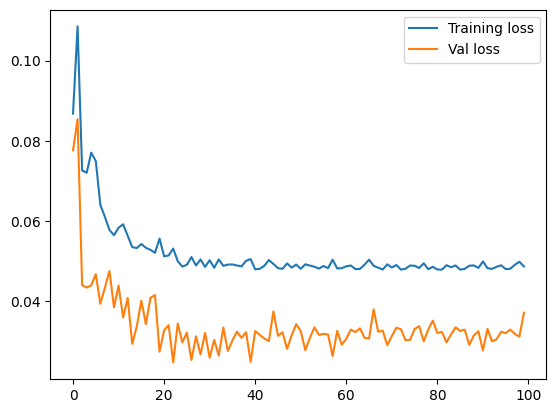

In [236]:
plt.plot(train_hist, label="Training loss")
plt.plot(val_hist, label="Val loss")
plt.legend()

In [237]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_test, y_pred):
    print('* MAE:', mean_absolute_error(y_test, y_pred))
    print('* RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('* R_Square:', r2_score(y_test, y_pred))

In [238]:
pred_dataset = X_test

with torch.no_grad():
    preds_lstm = []
    for _ in range(len(pred_dataset)):
        model_lstm.reset_hidden_state()
        y_test_pred = model_lstm(torch.unsqueeze(pred_dataset[_], 0))
        pred = torch.flatten(y_test_pred).item()
        preds_lstm.append(pred)

In [239]:
y_test[0].mean()

tensor(0.0041)

In [240]:
y_test_list = []

for i in range(len(y_test)):
    y_test_list.append(y_test[i].mean().item())

In [241]:
y_test_list

[0.004092864692211151,
 0.0030390929896384478,
 0.0010438718600198627,
 0.0005517660756595433,
 0.0005181780434213579]

In [242]:
preds_lstm

[-0.038136787712574005,
 -0.09432843327522278,
 -0.04885917901992798,
 -0.07978953421115875,
 -0.10092192888259888]

In [243]:
evaluate(np.array(y_test_list)*MAX, np.array(preds_lstm)*MAX)

* MAE: 83.98390623566229
* RMSE: 88.33234977545919
* R_Square: -2888.9651899724904
